### Import libraries

In [6]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS 

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [7]:
# Load data
x_tr_N2 = np.loadtxt('./data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('./data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('./data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('./data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### MLP with activation ReLU and L-BFGS solver

In [8]:
# run from 16 different random_states
# Save each run's trained classifier object and loss value in lists

trained_cl1 = list()
random_state_list = list(range(0,16))
loss_value1 = list()

for i in random_state_list:
    

    n_runs = 16
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    
    trained_cl1.append(mlp_lbfgs)
    loss_value = mlp_lbfgs.loss_curve_
    loss_value1.append(loss_value)

finished LBFGS run  1/16 after    0.2 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  1/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

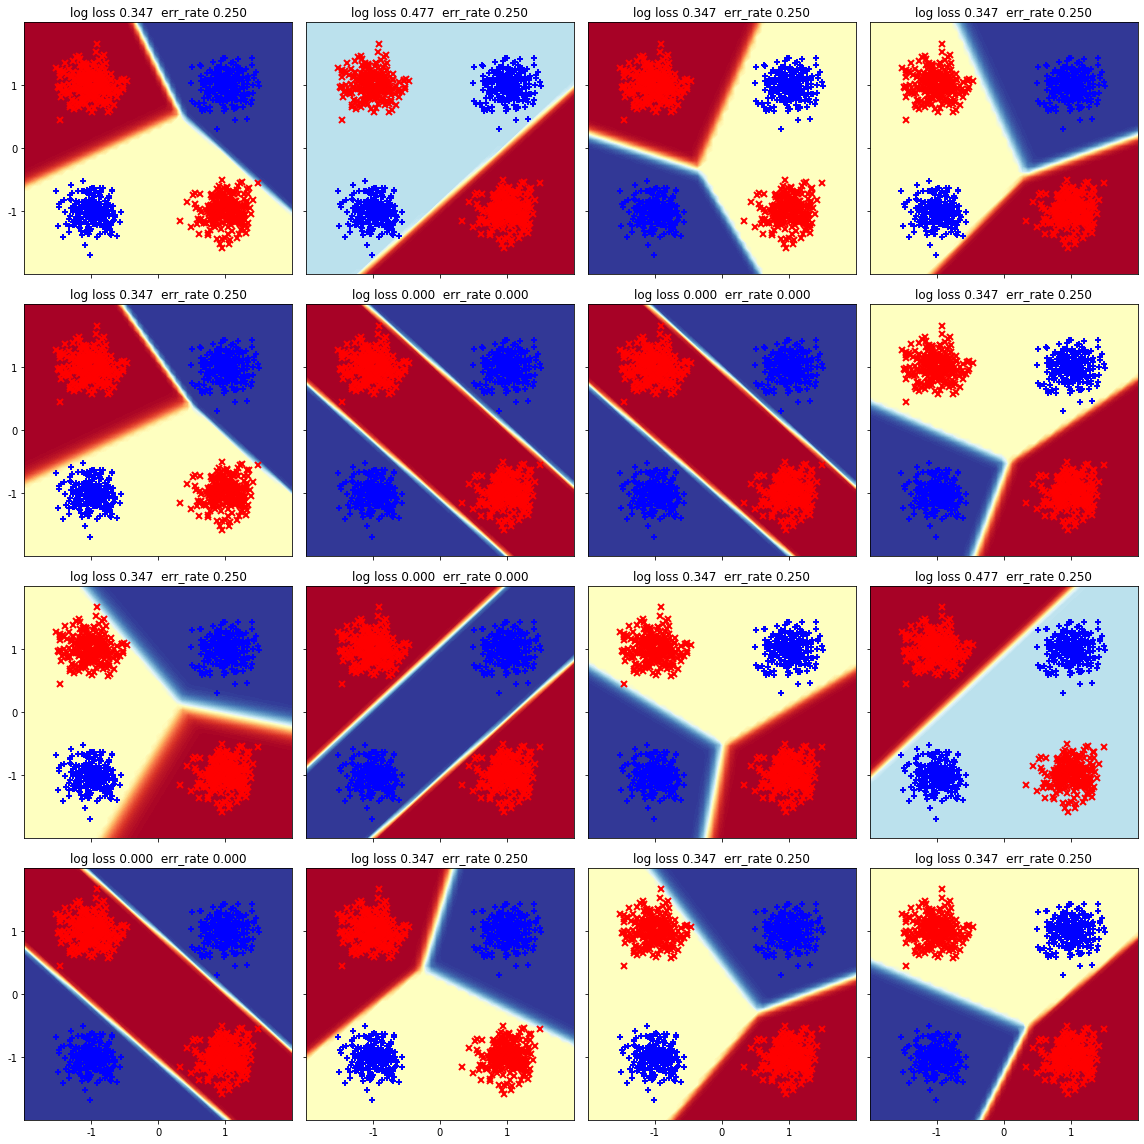

In [10]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),sharex=True, sharey=True)

for i in range(16):    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//4 
    subplot_col = i%4  
    ax = ax_grid[subplot_row, subplot_col]
        
    # plot image on subplot
    plot_pretty_probabilities_for_clf(trained_cl1[i], x_tr_N2, y_tr_N, ax)


plt.tight_layout()
plt.show()

1/4 of runs reach 0 training error. It seems to converge around 30 iterations, very rapidly.

### MLP with activation Logistic and L-BFGS solver

In [11]:

trained_cl2 = list()
random_state_list = list(range(0,16))
loss_value2 = list()

for i in random_state_list:
    

    n_runs = 16
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    
    trained_cl2.append(mlp_lbfgs)
    loss_value = mlp_lbfgs.loss_curve_
    loss_value2.append(loss_value)

finished LBFGS run  1/16 after    0.1 sec |  56 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.1 sec | 121 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  75 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  1/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  14 iters | converged    | loss 0.537
finished LBFGS run  1/16 after    0.0 sec |  61 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.1 sec | 118 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  66 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  95 iters | converged    | loss 0.347
finished LBFGS r

#### Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

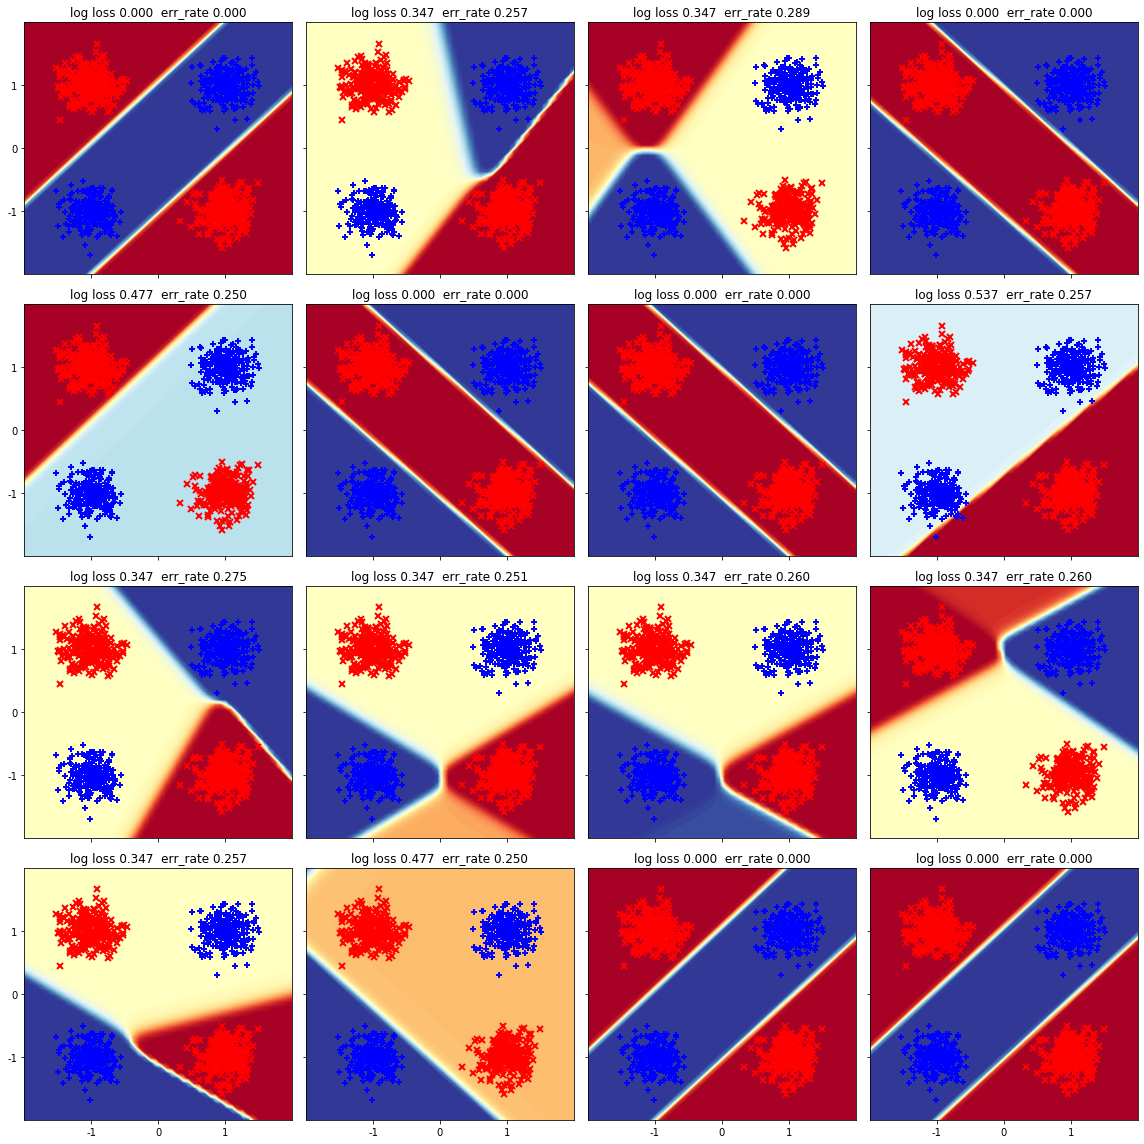

In [12]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),sharex=True, sharey=True)

for i in range(16):    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//4 
    subplot_col = i%4  
    ax = ax_grid[subplot_row, subplot_col]
        
    # plot image on subplot
    plot_pretty_probabilities_for_clf(trained_cl2[i], x_tr_N2, y_tr_N, ax)


plt.tight_layout()
plt.show()

3/8 of runs reach 0 training error. It seems to converge around 60 iterations, slower than former one.

### MLP with activation ReLU and SGD solver

In [13]:
trained_cl3 = list()
random_state_list = list(range(0,16))
loss_value3 =list()

for i in random_state_list:

    n_runs = 16
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
   
    trained_cl3.append(mlp_sgd)
    loss_value = mlp_sgd.loss_curve_
    loss_value3.append(loss_value)
    

finished SGD run  1/16 after    5.1 sec | 267 epochs | converged     | loss 0.347
finished SGD run  1/16 after    6.0 sec | 307 epochs | converged     | loss 0.478
finished SGD run  1/16 after    5.0 sec | 239 epochs | converged     | loss 0.347
finished SGD run  1/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  1/16 after    5.1 sec | 275 epochs | converged     | loss 0.347
finished SGD run  1/16 after    8.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  1/16 after   11.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  1/16 after    6.7 sec | 273 epochs | converged     | loss 0.347
finished SGD run  1/16 after    4.3 sec | 219 epochs | converged     | loss 0.347
finished SGD run  1/16 after    8.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  1/16 after    8.4 sec | 394 epochs | converged     | loss 0.478
finished SGD run  1/16 after    8.2 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### Visualize probabilistic predictions in 2D feature space for ReLU + SGD¶

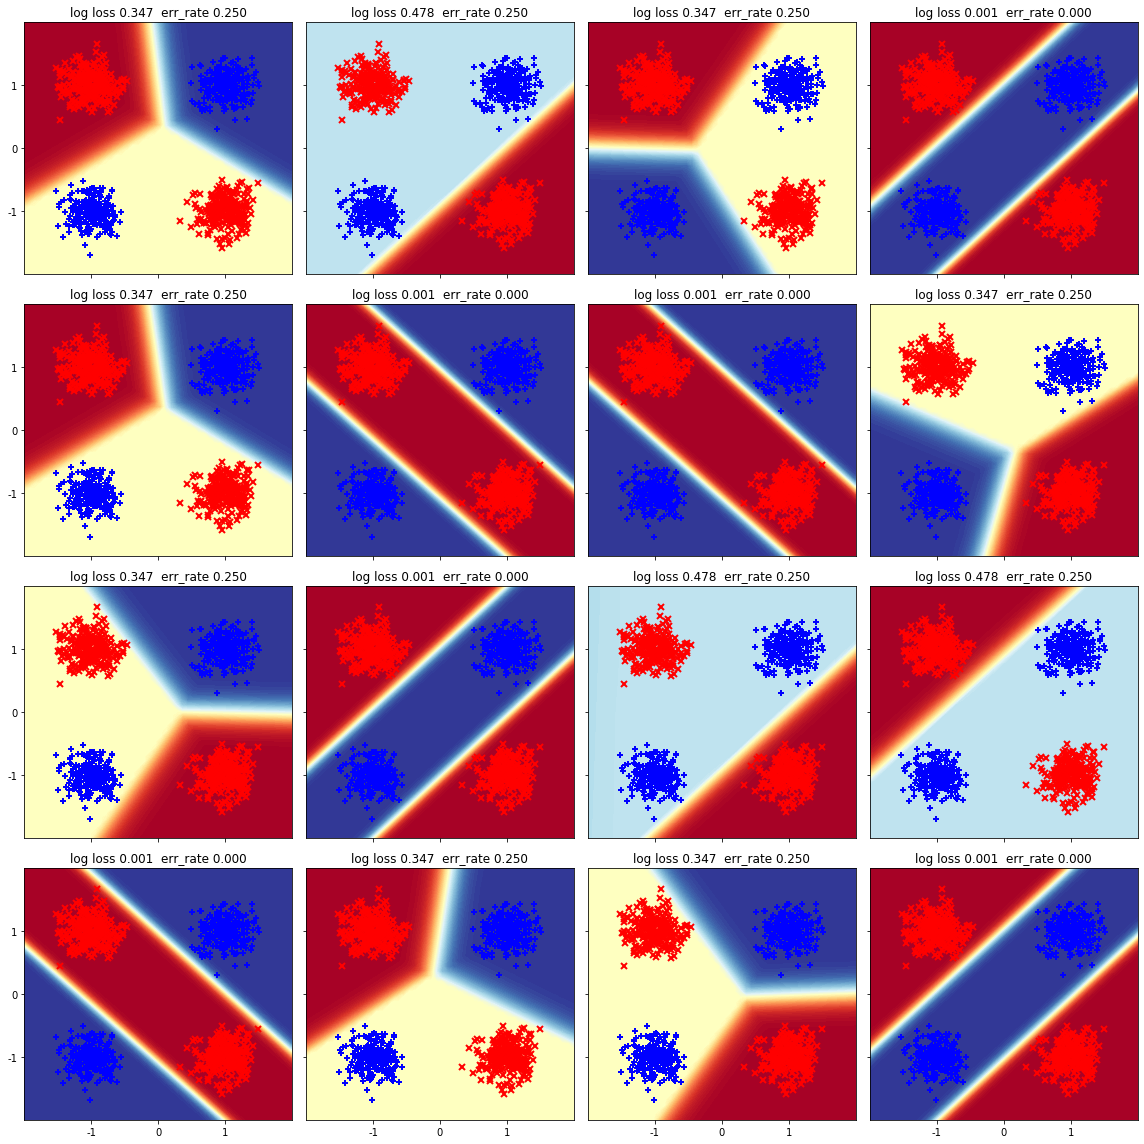

In [14]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),sharex=True, sharey=True)

for i in range(16):    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//4 
    subplot_col = i%4  
    ax = ax_grid[subplot_row, subplot_col]
        
    # plot image on subplot
    plot_pretty_probabilities_for_clf(trained_cl3[i], x_tr_N2, y_tr_N, ax)


plt.tight_layout()
plt.show()

 3/8 of runs reach 0 training error. It seems to converge very slowly or even does not converge.

The most noticeably difference is L-BFGS can get solution with less iterations.
After some online research, I find out that L-BFGS is a Quasi-Newton methods, which approximate the Hessian based on differences of gradients over several iterations, by imposing a "secant" (Quasi-Newton) condition. It will generally require much fewer iterations as compared to gradient descent methods.
It estimates the curvature of the parameter space via an approximation of the Hessian. So if your parameter space has plenty of long, nearly-flat valleys then L-BFGS would likely perform well.


### MLP with activation Logistic and SGD solver

In [15]:
trained_cl4 = list()
random_state_list = list(range(0,16))
loss_value4 = list()

for i in random_state_list:

    n_runs = 16
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
   
    trained_cl4.append(mlp_sgd)
    loss_value = mlp_sgd.loss_curve_
    loss_value4.append(loss_value)
    

finished SGD run  1/16 after    2.6 sec | 161 epochs | converged     | loss 0.693
finished SGD run  1/16 after    6.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  1/16 after    7.1 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  1/16 after    4.6 sec | 215 epochs | converged     | loss 0.693
finished SGD run  1/16 after    7.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  1/16 after    7.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  1/16 after    6.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  1/16 after    6.7 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  1/16 after    6.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  1/16 after    6.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  1/16 after    1.8 sec | 124 epochs | converged     | loss 0.693
finished SGD run  1/16 after    7.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### Visualize probabilistic predictions in 2D feature space for Logistic + SGD

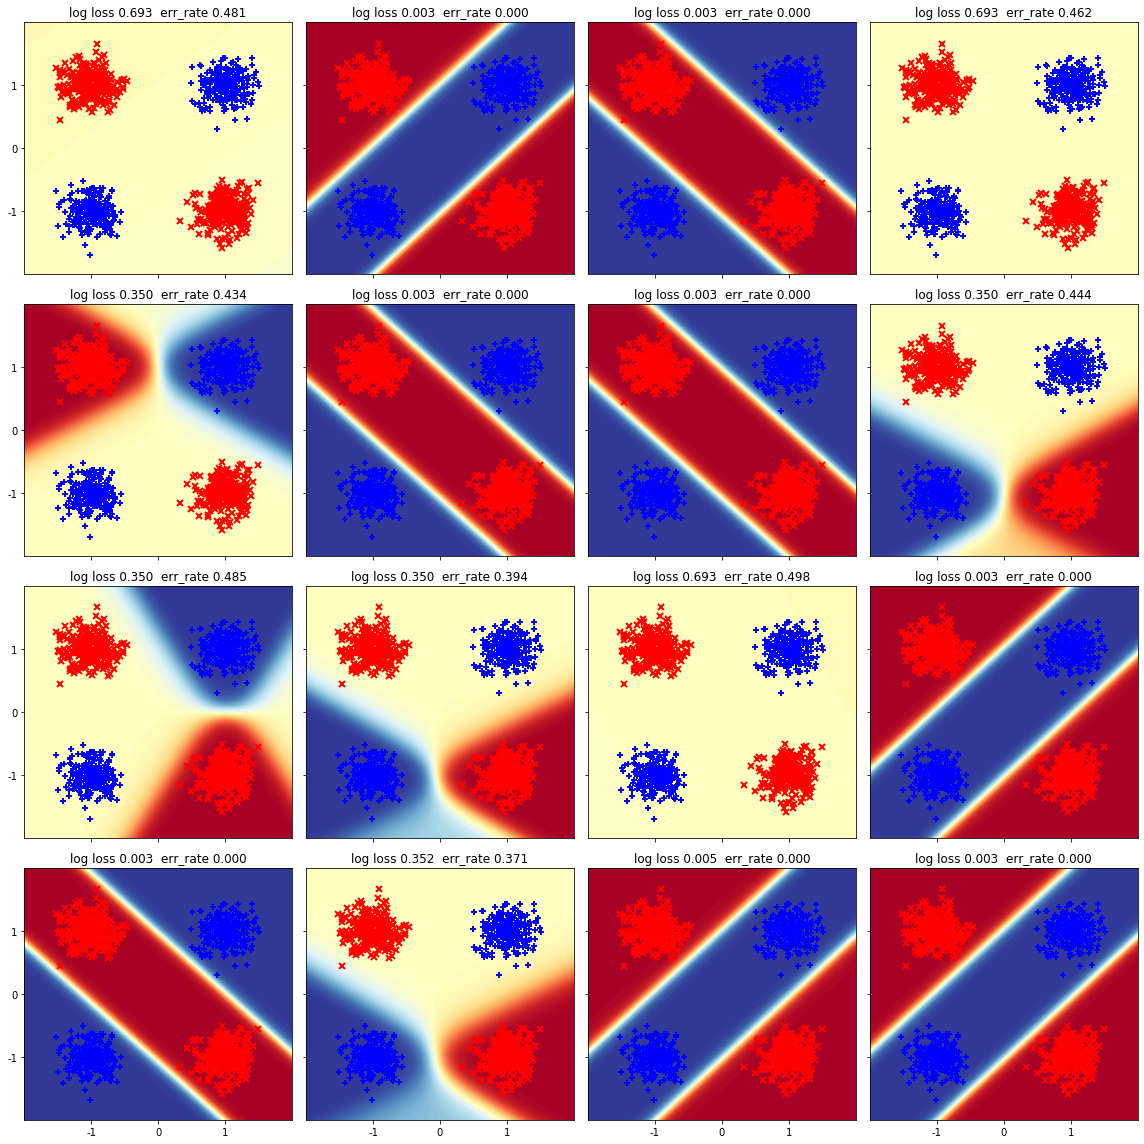

In [16]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16),sharex=True, sharey=True)

for i in range(16):    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//4 
    subplot_col = i%4  
    ax = ax_grid[subplot_row, subplot_col]
        
    # plot image on subplot
    plot_pretty_probabilities_for_clf(trained_cl4[i], x_tr_N2, y_tr_N, ax)


plt.tight_layout()
plt.show()

1/2 of runs reach 0 training error. It seems to converge very slowly or even does not converge.

The most noticeably difference is SGD requires more iterations(up to 10 times). The reason is the same as above. SGD is a first order method. L-BFGS is a second order method based on Quasi-Newton, which require much fewer iterations.

### Comparing loss_curves

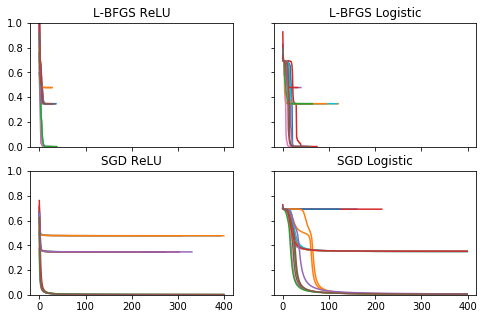

In [17]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots



for i in range(16):
    
    ax_grid[0,0].plot(loss_value1[i])
    ax_grid[0,1].plot(loss_value2[i])
    ax_grid[1,0].plot(loss_value3[i])
    ax_grid[1,1].plot(loss_value4[i])

From our plots, the ReLU activation function seems easier to optimize. The logistic function requires more iterations in general.

However, I am not convinced that one activation function is always easier to optimize. We need to consider fraction of runs reach 0 training error, validation accuracy, or maybe fraction of dead units in hidden layers as well.